In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\bouwa\Desktop\Anis Bwz\Learning\DSI\visualization\Toronto Island Ferry Ticket Counts.csv')
print(df.head())


   _id            Timestamp  Redemption Count  Sales Count
0    1  2025-03-07T17:45:00                19           25
1    2  2025-03-07T17:30:00                44           21
2    3  2025-03-07T17:15:00                32           27
3    4  2025-03-07T17:00:00                13           18
4    5  2025-03-07T16:45:00                 1            0


In [5]:
df.info

<bound method DataFrame.info of            _id            Timestamp  Redemption Count  Sales Count
0            1  2025-03-07T17:45:00                19           25
1            2  2025-03-07T17:30:00                44           21
2            3  2025-03-07T17:15:00                32           27
3            4  2025-03-07T17:00:00                13           18
4            5  2025-03-07T16:45:00                 1            0
...        ...                  ...               ...          ...
239934  239935  2015-05-04T16:00:00                 0            2
239935  239936  2015-05-01T16:00:00                 1            0
239936  239937  2015-05-01T15:45:00                 0            1
239937  239938  2015-05-01T15:15:00                 0            2
239938  239939  2015-05-01T13:30:00                 0            1

[239939 rows x 4 columns]>

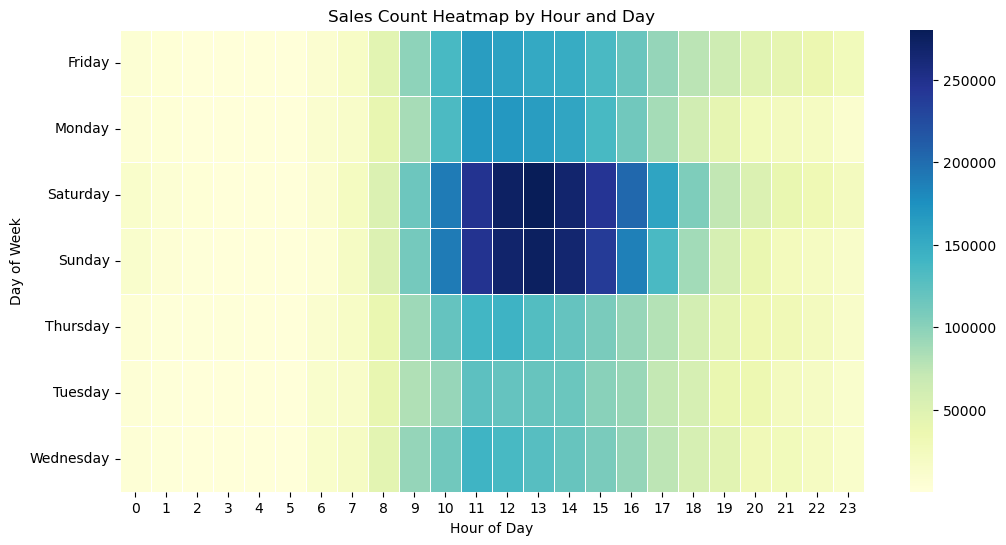

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (modify the path accordingly)
df = pd.read_csv(r'C:\Users\bouwa\Desktop\Anis Bwz\Learning\DSI\visualization\Toronto Island Ferry Ticket Counts.csv')

# Convert timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day_name()

# Pivot table to create heatmap
heatmap_data = df.pivot_table(index='Day', columns='Hour', values='Sales Count', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)

plt.title("Sales Count Heatmap by Hour and Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

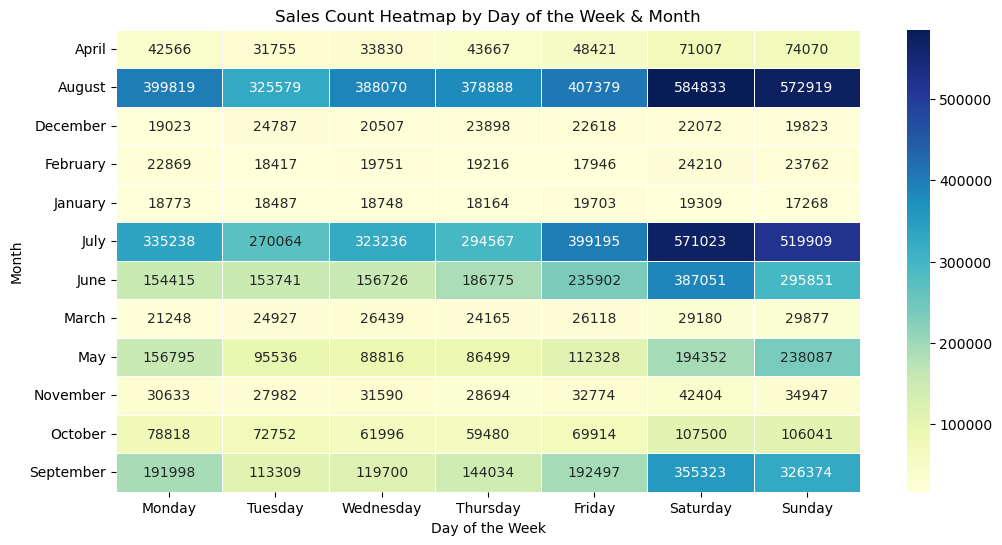

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (update path)
df = pd.read_csv(r'C:\Users\bouwa\Desktop\Anis Bwz\Learning\DSI\visualization\Toronto Island Ferry Ticket Counts.csv')

# Convert timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Year, Month, and Day of the Week
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month_name()
df['Day of Week'] = df['Timestamp'].dt.day_name()

# Aggregate data by Month and Day of the Week
heatmap_data = df.pivot_table(index='Month', columns='Day of Week', values='Sales Count', aggfunc='sum')

# Reorder days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data[day_order]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".0f")

plt.title("Sales Count Heatmap by Day of the Week & Month")
plt.xlabel("Day of the Week")
plt.ylabel("Month")
plt.show()


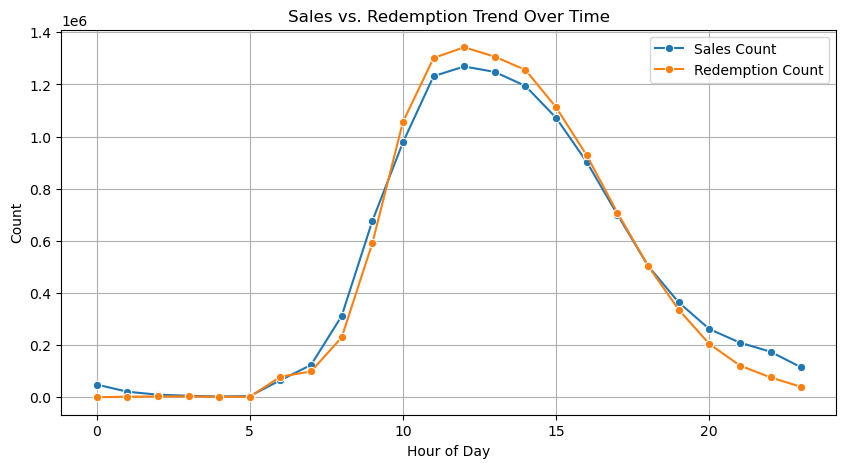

In [12]:
# Aggregate data by hour
df_time = df.groupby(df['Timestamp'].dt.hour)[['Sales Count', 'Redemption Count']].sum().reset_index()

# Plot sales vs redemptions
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_time, x='Timestamp', y='Sales Count', marker='o', label='Sales Count')
sns.lineplot(data=df_time, x='Timestamp', y='Redemption Count', marker='o', label='Redemption Count')

plt.title("Sales vs. Redemption Trend Over Time")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()


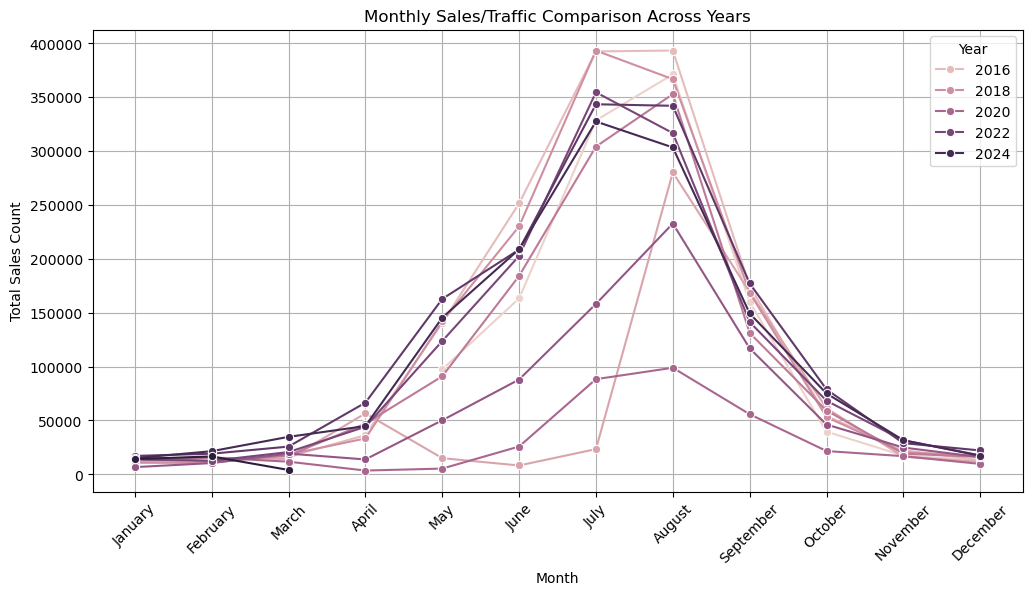

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update the path)
df = pd.read_csv(r'C:\Users\bouwa\Desktop\Anis Bwz\Learning\DSI\visualization\Toronto Island Ferry Ticket Counts.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Year and Month
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month_name()

# Aggregate data by Month and Year
monthly_data = df.groupby(['Year', 'Month'])['Sales Count'].sum().reset_index()

# Sort months in correct order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=month_order, ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='Month', y='Sales Count', hue='Year', marker="o")

plt.title("Monthly Sales/Traffic Comparison Across Years")
plt.xlabel("Month")
plt.ylabel("Total Sales Count")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(True)

plt.show()


<Figure size 1200x600 with 0 Axes>

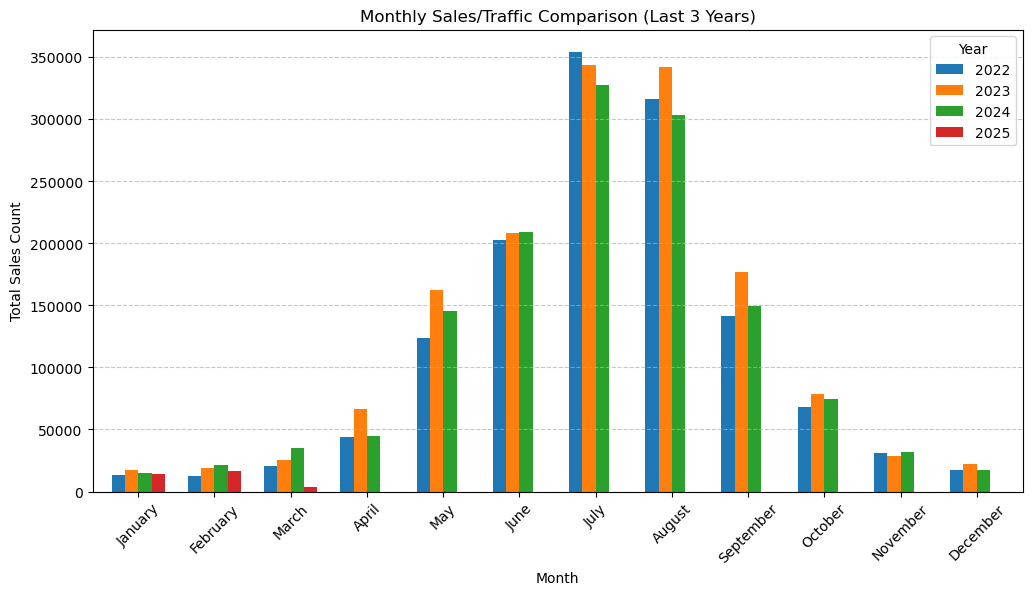

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update path)
df = pd.read_csv(r'C:\Users\bouwa\Desktop\Anis Bwz\Learning\DSI\visualization\Toronto Island Ferry Ticket Counts.csv')

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Year and Month
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month_name()

# Filter for the last three years
last_three_years = sorted(df['Year'].unique())[-4:]  # Get last three years dynamically
df = df[df['Year'].isin(last_three_years)]

# Aggregate data by Month and Year
monthly_data = df.groupby(['Year', 'Month'])['Sales Count'].sum().reset_index()

# Sort months in correct order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=month_order, ordered=True)

# Pivot data for bar chart format
pivot_data = monthly_data.pivot(index='Month', columns='Year', values='Sales Count')

# Plot
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', figsize=(12, 6), width=0.7)

plt.title("Monthly Sales/Traffic Comparison (Last 3 Years)")
plt.xlabel("Month")
plt.ylabel("Total Sales Count")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
